In [5]:
# Loaded variable 'df' from URI: /mnt/e/Foundation of Data Science/ass 1/dataset1.csv
import pandas as pd
df = pd.read_csv(r'/mnt/e/Foundation of Data Science/ass 1/dataset1.csv', engine='pyarrow')
df2 = pd.read_csv(r'/mnt/e/Foundation of Data Science/ass 1/dataset2.csv', engine='pyarrow')

In [9]:
df2.head

<bound method NDFrame.head of                   time  month  hours_after_sunset  bat_landing_number  \
0     26/12/2017 16:13      0                -0.5                  20   
1     26/12/2017 16:43      0                 0.0                  28   
2     26/12/2017 17:13      0                 0.5                  25   
3     26/12/2017 17:43      0                 1.0                  71   
4     26/12/2017 18:13      0                 1.5                  44   
...                ...    ...                 ...                 ...   
2118    1/06/2018 3:41      6                 8.0                  20   
2119    1/06/2018 4:11      6                 8.5                   7   
2120    1/06/2018 4:41      6                 9.0                   6   
2121    1/06/2018 5:11      6                 9.5                   7   
2122    1/06/2018 5:41      6                10.0                   2   

      food_availability  rat_minutes  rat_arrival_number  
0              4.000000          0

In [10]:
df['rat_period_start'] = pd.to_datetime(df['rat_period_start'], format='%d/%m/%Y %H:%M')
df['rat_period_end'] = pd.to_datetime(df['rat_period_end'], format='%d/%m/%Y %H:%M')
df['sunset_time'] = pd.to_datetime(df['sunset_time'], format='%d/%m/%Y %H:%M')
df['start_time'] = pd.to_datetime(df['start_time'], format='%d/%m/%Y %H:%M')
df2["time"] = pd.to_datetime(df2["time"], format='%d/%m/%Y %H:%M')

In [11]:
df.describe()

,start_time,bat_landing_to_food,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
count,907,907.000000,907,907,907.000000,907.000000,907.000000,907.000000,907,907.000000,907.000000
mean,2018-04-11 20:41:27.056229120,11.713134,2018-04-11 20:36:43.395810304,2018-04-11 20:45:54.178610944,282.877619,0.495039,0.533627,3.800441,2018-04-11 15:10:02.050716672,5.531863,0.833517
min,2017-12-26 20:57:00,0.010238,2017-12-26 20:53:00,2017-12-26 20:58:00,0.000000,0.000000,0.000000,0.000000,2017-12-26 16:43:00,-0.261667,0.000000
25%,2018-04-03 23:29:00,1.000000,2018-04-03 23:24:00,2018-04-03 23:40:00,89.500000,0.000000,0.000000,4.000000,2018-04-03 19:01:00,3.779028,1.000000
50%,2018-04-27 00:28:00,4.000000,2018-04-27 00:24:00,2018-04-27 00:28:00,206.000000,0.000000,1.000000,4.000000,2018-04-26 19:17:00,5.622778,1.000000
75%,2018-05-01 00:07:30,11.500000,2018-05-01 00:06:00,2018-05-01 00:09:00,446.500000,1.000000,1.000000,5.000000,2018-04-30 19:20:00,7.402778,1.000000
max,2018-05-31 23:34:00,443.000000,2018-05-31 23:31:00,2018-05-31 23:34:00,949.000000,1.000000,1.000000,5.000000,2018-05-31 19:41:00,12.091944,1.000000
std,NaN,27.644410,NaN,NaN,240.974918,0.500251,0.499143,1.199190,NaN,2.414146,0.372719


In [20]:
df = df.fillna({'habit': df['habit'].ffill()})

In [21]:
df['habit'].unique()

array(['rat', 'fast', 'pick', 'bat_fight', 'rat_and_no_food',
       'rat_and_others', 'pick_and_others', 'gaze', 'pick_rat', 'bat',
       'both', 'pick_bat',
       '94.0,305.0,239.0,416.0; 364.8,139.3,462.3,241.3', 'rat attack',
       'attack_rat', 'bat_and_rat', 'rat_attack', 'other_bats',
       'rat_pick', 'rat_and_bat', 'bowl_out', 'other_bat',
       '373.0,80.0,504.0,148.0; 274.6,110.7,382.4,267.3', 'other',
       '245.6,179.5,321.4,314.0; 522.4,0.3,592.0,95.5', 'eating',
       'rat_to_bat', 'other_bats/rat',
       '405.6,112.3,513.1,215.4; 464.1,197.7,614.9,334.3; 511.5,301.1,639.4,388.9',
       'pick_and_all', 'bat_and_pick', 'bat_fight_and_pick',
       '187.0,152.0,304.0,240.0; 567.9,88.6,621.1,140.3',
       '44.0,77.0,157.0,240.0; 253.0,96.0,346.0,147.0',
       '397.7,159.7,580.2,330.5; 252.0,92.0,346.0,149.0', 'pick_and_bat',
       '218.0,171.0,381.0,269.0; 239.0,106.0,315.0,155.0',
       '423.0,155.9,535.6,370.9; 238.0,99.0,314.0,160.0',
       'eating_and_bat_

In [22]:
df['bat_landing_to_food'].dtype

dtype('float64')

In [23]:
# Basic statistics for key variables
print("=== KEY VARIABLE STATISTICS ===")
print("\n1. Approach Time to Food:")
print(f"Mean: {df['bat_landing_to_food'].mean():.2f} seconds")
print(f"Median: {df['bat_landing_to_food'].median():.2f} seconds")
print(f"Standard deviation: {df['bat_landing_to_food'].std():.2f} seconds")

print("\n2. Risk Behavior:")
print(df['risk'].value_counts())
print(f"Risk-taking rate: {df['risk'].mean():.3f} ({df['risk'].mean()*100:.1f}%)")

print("\n3. Success Rate:")
print(df['reward'].value_counts())
print(f"Overall success rate: {df['reward'].mean():.3f} ({df['reward'].mean()*100:.1f}%)")

print("\n4. Landing Context:")
print(df['habit'].value_counts())

# Cross-tabulations (relationships between variables)
print("\n=== CROSS-TABULATIONS ===")
print("\n1. Risk vs Reward:")
print(pd.crosstab(df['risk'], df['reward'], margins=True))

print("\n2. Habit vs Risk:")
print(pd.crosstab(df['habit'], df['risk'], margins=True))

print("\n3. Habit vs Reward:")
print(pd.crosstab(df['habit'], df['reward'], margins=True))

=== KEY VARIABLE STATISTICS ===

1. Approach Time to Food:
Mean: 11.71 seconds
Median: 4.00 seconds
Standard deviation: 27.64 seconds

2. Risk Behavior:
risk
0    458
1    449
Name: count, dtype: int64
Risk-taking rate: 0.495 (49.5%)

3. Success Rate:
reward
1    484
0    423
Name: count, dtype: int64
Overall success rate: 0.534 (53.4%)

4. Landing Context:
habit
fast                                                255
rat                                                 232
pick                                                146
bat                                                  30
bat_fight                                            26
                                                   ... 
bat_fight_and_rat                                     1
rat_and_rat                                           1
not_sure_rat                                          1
501.0,358.4,636.2,423.4; 476.0,103.0,634.0,206.0      1
rat_and_bat_and_pick                                  1
Name: count, Lengt

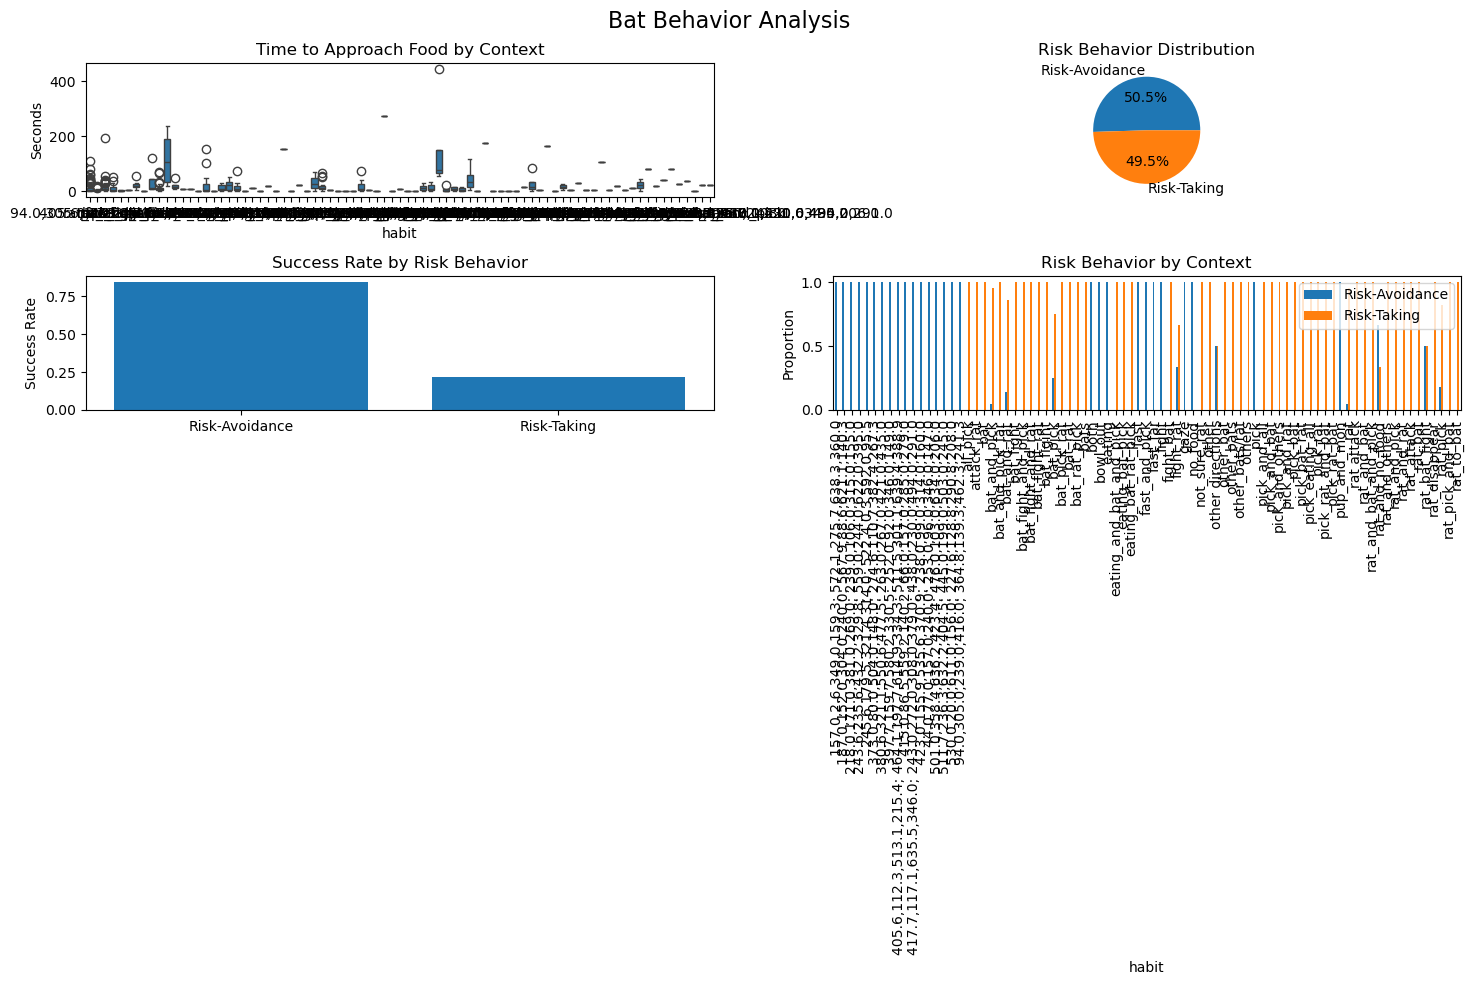

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Bat Behavior Analysis', fontsize=16)

# Plot 1: Approach time by habit
sns.boxplot(data=df, x='habit', y='bat_landing_to_food', ax=axes[0,0])
axes[0,0].set_title('Time to Approach Food by Context')
axes[0,0].set_ylabel('Seconds')

# Plot 2: Risk behavior distribution
risk_counts = df['risk'].value_counts()
axes[0,1].pie(risk_counts.values, labels=['Risk-Avoidance', 'Risk-Taking'], autopct='%1.1f%%')
axes[0,1].set_title('Risk Behavior Distribution')

# Plot 3: Success rate by risk behavior
success_by_risk = df.groupby('risk')['reward'].mean()
axes[1,0].bar(['Risk-Avoidance', 'Risk-Taking'], success_by_risk.values)
axes[1,0].set_title('Success Rate by Risk Behavior')
axes[1,0].set_ylabel('Success Rate')

# Plot 4: Risk behavior by context
habit_risk = pd.crosstab(df['habit'], df['risk'], normalize='index')
habit_risk.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Risk Behavior by Context')
axes[1,1].set_ylabel('Proportion')
axes[1,1].legend(['Risk-Avoidance', 'Risk-Taking'])

plt.tight_layout()
plt.show()

=== CLEANING HABIT DATA ===
Original habit categories: 81
Top 10 categories:
habit
fast            255
rat             232
pick            146
bat              30
bat_fight        26
bat_and_rat      22
bat_and_pick     21
rat_pick         17
rat_and_bat      14
pick_and_bat      8
Name: count, dtype: int64

Cleaned habit categories:
habit_clean
fast       256
rat        245
pick       164
bat        116
other      109
unknown     17
Name: count, dtype: int64


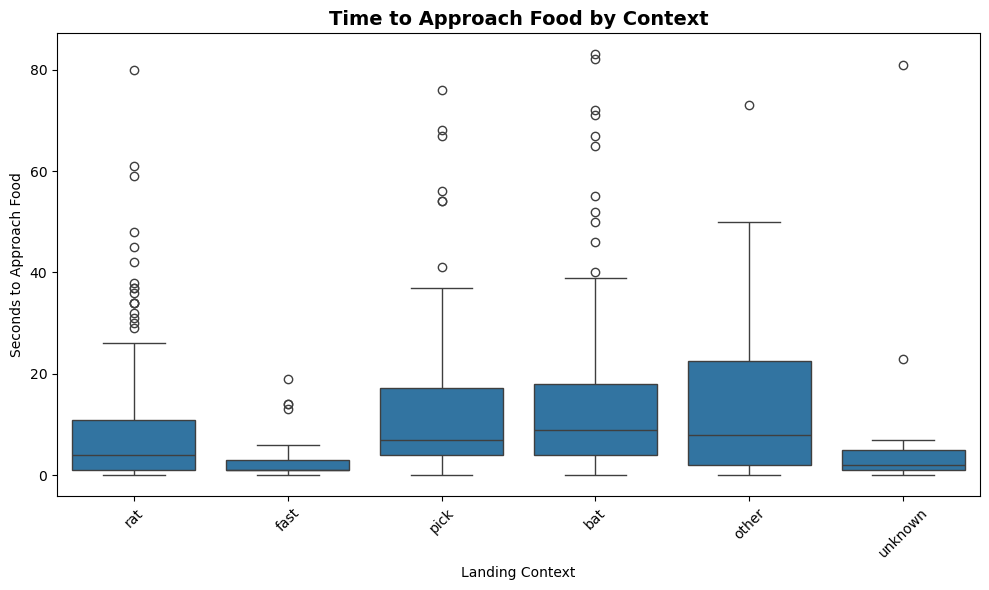

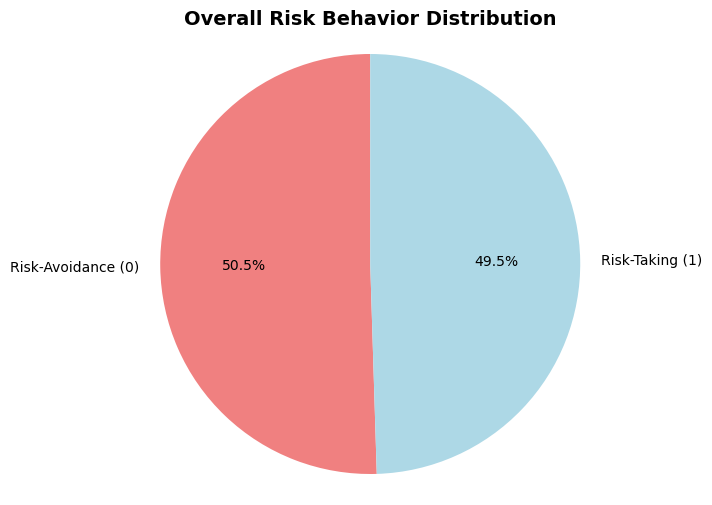

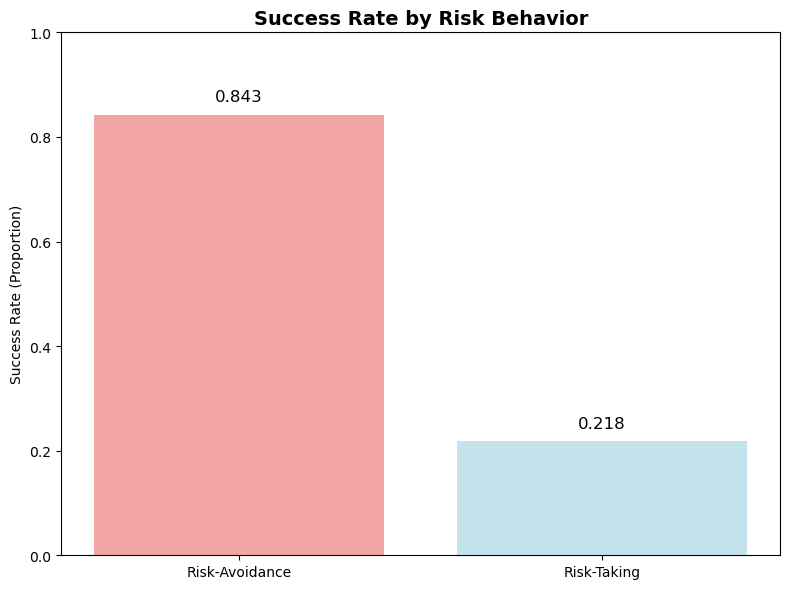

<Figure size 1000x600 with 0 Axes>

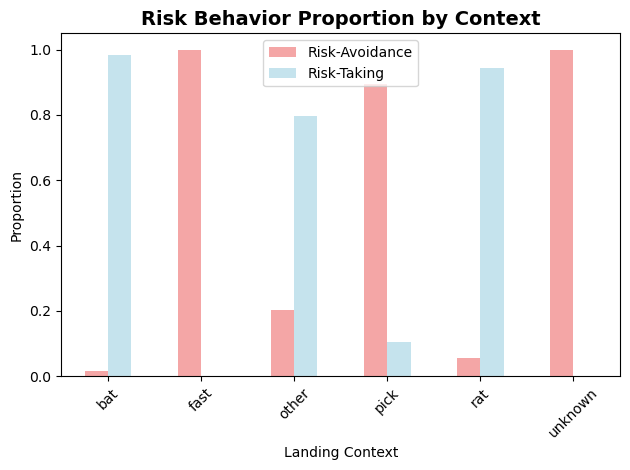

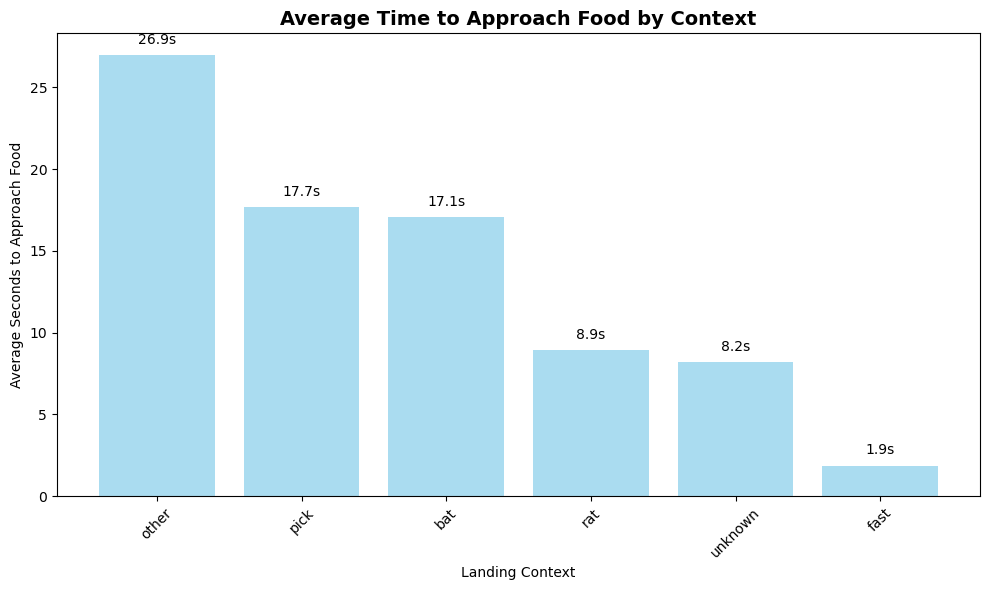

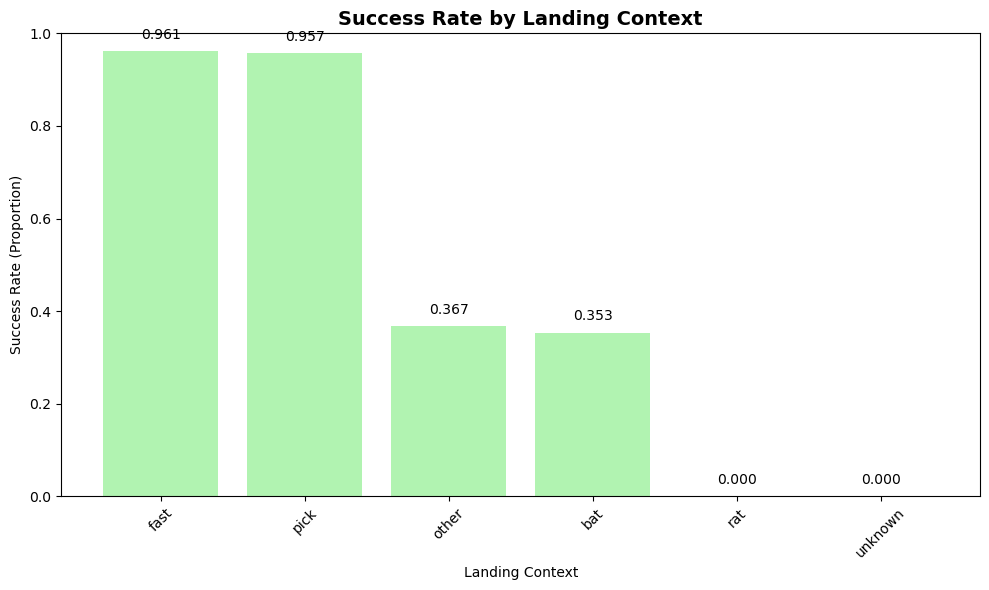


=== CLEANED DATA ANALYSIS ===

1. Approach Time by Context:
              mean  median  count
habit_clean                      
bat          17.06     9.0    116
fast          1.88     1.0    256
other        26.94    12.0    109
pick         17.67     7.0    164
rat           8.94     4.0    245
unknown       8.19     2.0     17

2. Risk Behavior by Context:
              mean  count  risk_taking_percentage
habit_clean                                      
bat          0.983    116                  98.276
fast         0.000    256                   0.000
other        0.798    109                  79.817
pick         0.104    164                  10.366
rat          0.943    245                  94.286
unknown      0.000     17                   0.000

3. Success Rate by Context:
              mean  count  success_percentage
habit_clean                                  
bat          0.353    116              35.345
fast         0.961    256              96.094
other        0.367    10

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# First, let's clean the habit column - keep only the main categories
print("=== CLEANING HABIT DATA ===")
print("Original habit categories:", df['habit'].nunique())
print("Top 10 categories:")
print(df['habit'].value_counts().head(10))

# Clean the habit column - keep only meaningful categories
def clean_habit(habit):
    if pd.isna(habit):
        return 'unknown'
    habit = str(habit).lower()
    if 'rat' in habit and 'bat' not in habit and 'pick' not in habit:
        return 'rat'
    elif 'bat' in habit and 'rat' not in habit:
        return 'bat'
    elif 'pick' in habit and 'rat' not in habit:
        return 'pick'
    elif 'fast' in habit:
        return 'fast'
    elif any(char.isdigit() for char in habit):  # Remove coordinate data
        return 'unknown'
    else:
        return 'other'

# Apply cleaning
df['habit_clean'] = df['habit'].apply(clean_habit)
print("\nCleaned habit categories:")
print(df['habit_clean'].value_counts())

# CHART 1: Time to Approach Food by Context
plt.figure(figsize=(10, 6))
# Remove extreme outliers for better visualization
df_clean = df[df['bat_landing_to_food'] < 100]  # Remove values > 100 seconds
sns.boxplot(data=df_clean, x='habit_clean', y='bat_landing_to_food')
plt.title('Time to Approach Food by Context', fontsize=14, fontweight='bold')
plt.xlabel('Landing Context')
plt.ylabel('Seconds to Approach Food')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CHART 2: Risk Behavior Distribution (Simple Pie Chart)
plt.figure(figsize=(8, 6))
risk_counts = df['risk'].value_counts()
colors = ['lightcoral', 'lightblue']
labels = ['Risk-Avoidance (0)', 'Risk-Taking (1)']
plt.pie(risk_counts.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Overall Risk Behavior Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

# CHART 3: Success Rate by Risk Behavior
plt.figure(figsize=(8, 6))
success_by_risk = df.groupby('risk')['reward'].mean()
bars = plt.bar(['Risk-Avoidance', 'Risk-Taking'], success_by_risk.values, 
               color=['lightcoral', 'lightblue'], alpha=0.7)
plt.title('Success Rate by Risk Behavior', fontsize=14, fontweight='bold')
plt.ylabel('Success Rate (Proportion)')
plt.ylim(0, 1)
# Add value labels on bars
for bar, value in zip(bars, success_by_risk.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

# CHART 4: Risk Behavior by Clean Context
plt.figure(figsize=(10, 6))
habit_risk = pd.crosstab(df['habit_clean'], df['risk'], normalize='index')
habit_risk.plot(kind='bar', color=['lightcoral', 'lightblue'], alpha=0.7)
plt.title('Risk Behavior Proportion by Context', fontsize=14, fontweight='bold')
plt.xlabel('Landing Context')
plt.ylabel('Proportion')
plt.legend(['Risk-Avoidance', 'Risk-Taking'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CHART 5: Average Approach Time by Context (Bar Chart)
plt.figure(figsize=(10, 6))
avg_approach = df.groupby('habit_clean')['bat_landing_to_food'].mean().sort_values(ascending=False)
bars = plt.bar(avg_approach.index, avg_approach.values, color='skyblue', alpha=0.7)
plt.title('Average Time to Approach Food by Context', fontsize=14, fontweight='bold')
plt.xlabel('Landing Context')
plt.ylabel('Average Seconds to Approach Food')
plt.xticks(rotation=45)
# Add value labels
for bar, value in zip(bars, avg_approach.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value:.1f}s', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# CHART 6: Success Rate by Context
plt.figure(figsize=(10, 6))
success_by_habit = df.groupby('habit_clean')['reward'].mean().sort_values(ascending=False)
bars = plt.bar(success_by_habit.index, success_by_habit.values, color='lightgreen', alpha=0.7)
plt.title('Success Rate by Landing Context', fontsize=14, fontweight='bold')
plt.xlabel('Landing Context')
plt.ylabel('Success Rate (Proportion)')
plt.ylim(0, 1)
plt.xticks(rotation=45)
# Add value labels
for bar, value in zip(bars, success_by_habit.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{value:.3f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# SUMMARY STATISTICS FOR CLEANED DATA
print("\n=== CLEANED DATA ANALYSIS ===")
print("\n1. Approach Time by Context:")
approach_stats = df.groupby('habit_clean')['bat_landing_to_food'].agg(['mean', 'median', 'count'])
print(approach_stats.round(2))

print("\n2. Risk Behavior by Context:")
risk_stats = df.groupby('habit_clean')['risk'].agg(['mean', 'count'])
risk_stats['risk_taking_percentage'] = risk_stats['mean'] * 100
print(risk_stats.round(3))

print("\n3. Success Rate by Context:")
success_stats = df.groupby('habit_clean')['reward'].agg(['mean', 'count'])
success_stats['success_percentage'] = success_stats['mean'] * 100
print(success_stats.round(3))

# KEY INSIGHTS
print("\n=== KEY INSIGHTS ===")
rat_data = df[df['habit_clean'] == 'rat']
other_data = df[df['habit_clean'] != 'rat']

if len(rat_data) > 0:
    print(f"\nRAT context vs OTHER contexts:")
    print(f"Average approach time: {rat_data['bat_landing_to_food'].mean():.2f}s vs {other_data['bat_landing_to_food'].mean():.2f}s")
    print(f"Risk-taking rate: {rat_data['risk'].mean():.3f} vs {other_data['risk'].mean():.3f}")
    print(f"Success rate: {rat_data['reward'].mean():.3f} vs {other_data['reward'].mean():.3f}")

In [28]:
from scipy import stats

print("=== HYPOTHESIS TESTING ===")

# Test 1: Do bats take longer to approach food in 'rat' context?
rat_context = df[df['habit'] == 'rat']['bat_landing_to_food'].dropna()
non_rat_context = df[df['habit'] != 'rat']['bat_landing_to_food'].dropna()

t_stat, p_value = stats.ttest_ind(rat_context, non_rat_context)
print(f"\nTest 1 - Vigilance Hypothesis:")
print(f"Rat context mean: {rat_context.mean():.2f} seconds")
print(f"Non-rat context mean: {non_rat_context.mean():.2f} seconds")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

# Test 2: Is risk behavior different across contexts?
habit_risk_table = pd.crosstab(df['habit'], df['risk'])
chi2, p_chi2, dof, expected = stats.chi2_contingency(habit_risk_table)
print(f"\nTest 2 - Avoidance Hypothesis:")
print(f"Chi-square: {chi2:.3f}, P-value: {p_chi2:.3f}")

# Test 3: Correlation between timing and behavior
correlation, p_corr = stats.pearsonr(df['seconds_after_rat_arrival'], df['risk'])
print(f"\nTest 3 - Timing Effect:")
print(f"Correlation between arrival timing and risk: {correlation:.3f}")
print(f"P-value: {p_corr:.3f}")

=== HYPOTHESIS TESTING ===

Test 1 - Vigilance Hypothesis:
Rat context mean: 8.98 seconds
Non-rat context mean: 12.65 seconds
T-statistic: -1.750, P-value: 0.080

Test 2 - Avoidance Hypothesis:
Chi-square: 828.690, P-value: 0.000

Test 3 - Timing Effect:
Correlation between arrival timing and risk: 0.022
P-value: 0.505


In [29]:
from scipy import stats
import pandas as pd

print("=== STATISTICAL TESTS FOR PREDATOR HYPOTHESIS ===")

# Use the cleaned habit data
df['habit_clean'] = df['habit'].apply(clean_habit)

# TEST 1: VIGILANCE HYPOTHESIS
# Do bats take longer to approach food when rats are present?
print("\n1. VIGILANCE TEST (Approach Time)")
print("H0: No difference in approach time between rat and non-rat contexts")
print("H1: Bats take longer to approach food in rat contexts")

rat_approach = df[df['habit_clean'] == 'rat']['bat_landing_to_food'].dropna()
non_rat_approach = df[df['habit_clean'] != 'rat']['bat_landing_to_food'].dropna()

if len(rat_approach) > 0 and len(non_rat_approach) > 0:
    # Remove extreme outliers for more reliable test
    rat_approach = rat_approach[rat_approach < rat_approach.quantile(0.95)]
    non_rat_approach = non_rat_approach[non_rat_approach < non_rat_approach.quantile(0.95)]
    
    t_stat, p_value = stats.ttest_ind(rat_approach, non_rat_approach)
    
    print(f"Rat context: mean = {rat_approach.mean():.2f}s, n = {len(rat_approach)}")
    print(f"Non-rat context: mean = {non_rat_approach.mean():.2f}s, n = {len(non_rat_approach)}")
    print(f"T-statistic: {t_stat:.3f}")
    print(f"P-value: {p_value:.3f}")
    
    if p_value < 0.05:
        print("★ SIGNIFICANT: Bats show different approach times in rat contexts")
    else:
        print("✗ NOT SIGNIFICANT: No difference in approach times")
else:
    print("Insufficient data for t-test")

# TEST 2: AVOIDANCE HYPOTHESIS  
# Do bats show more risk-avoidance when rats are present?
print("\n2. AVOIDANCE TEST (Risk Behavior)")
print("H0: Risk behavior is independent of context")
print("H1: Bats show more avoidance in rat contexts")

# Create a simplified 2x2 table: rat vs non-rat, risk vs no-risk
df['is_rat_context'] = (df['habit_clean'] == 'rat').astype(int)
contingency_table = pd.crosstab(df['is_rat_context'], df['risk'])
print("Contingency Table:")
print("         Risk-Avoid  Risk-Take")
print(f"Non-rat     {contingency_table.iloc[0,0]:6d}     {contingency_table.iloc[0,1]:6d}")
print(f"Rat         {contingency_table.iloc[1,0]:6d}     {contingency_table.iloc[1,1]:6d}")

chi2, p_chi2, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square statistic: {chi2:.3f}")
print(f"P-value: {p_chi2:.3f}")
print(f"Degrees of freedom: {dof}")

if p_chi2 < 0.05:
    print("★ SIGNIFICANT: Risk behavior differs between contexts")
else:
    print("✗ NOT SIGNIFICANT: No association between context and risk behavior")

# Calculate effect size (Cramer's V)
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(f"Effect size (Cramer's V): {cramers_v:.3f}")

# TEST 3: SUCCESS RATE COMPARISON
print("\n3. SUCCESS RATE TEST")
print("H0: Success rate is same in rat and non-rat contexts")
print("H1: Success rate differs between contexts")

rat_success = df[df['habit_clean'] == 'rat']['reward']
non_rat_success = df[df['habit_clean'] != 'rat']['reward']

if len(rat_success) > 0 and len(non_rat_success) > 0:
    # Proportion test
    count1 = rat_success.sum()
    count2 = non_rat_success.sum()
    n1 = len(rat_success)
    n2 = len(non_rat_success)
    
    # Two-proportion z-test
    p1 = count1/n1
    p2 = count2/n2
    p_pooled = (count1 + count2)/(n1 + n2)
    
    z_stat = (p1 - p2) / np.sqrt(p_pooled * (1 - p_pooled) * (1/n1 + 1/n2))
    p_value_z = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    
    print(f"Rat context success rate: {p1:.3f} ({count1}/{n1})")
    print(f"Non-rat context success rate: {p2:.3f} ({count2}/{n2})")
    print(f"Z-statistic: {z_stat:.3f}")
    print(f"P-value: {p_value_z:.3f}")
    
    if p_value_z < 0.05:
        print("★ SIGNIFICANT: Success rates differ between contexts")
    else:
        print("✗ NOT SIGNIFICANT: No difference in success rates")

# OVERALL CONCLUSION
print("\n" + "="*50)
print("EVIDENCE FOR PREDATOR HYPOTHESIS:")
print("="*50)

evidence_count = 0
total_tests = 3

if 'p_value' in locals() and p_value < 0.05:
    print("✓ VIGILANCE: Bats show different approach times in rat contexts")
    evidence_count += 1
else:
    print("✗ VIGILANCE: No significant difference in approach times")

if 'p_chi2' in locals() and p_chi2 < 0.05:
    print("✓ AVOIDANCE: Risk behavior differs between contexts")
    evidence_count += 1
else:
    print("✗ AVOIDANCE: No significant difference in risk behavior")

if 'p_value_z' in locals() and p_value_z < 0.05:
    print("✓ SUCCESS: Success rates differ between contexts")
    evidence_count += 1
else:
    print("✗ SUCCESS: No significant difference in success rates")

print(f"\nOVERALL: {evidence_count}/{total_tests} tests support the predator hypothesis")

if evidence_count >= 2:
    print("🎯 STRONG EVIDENCE: Bats likely perceive rats as predators")
elif evidence_count == 1:
    print("⚠️  WEAK EVIDENCE: Some support for predator hypothesis")
else:
    print("❌ NO EVIDENCE: Bats do not appear to perceive rats as predators")

=== STATISTICAL TESTS FOR PREDATOR HYPOTHESIS ===

1. VIGILANCE TEST (Approach Time)
H0: No difference in approach time between rat and non-rat contexts
H1: Bats take longer to approach food in rat contexts
Rat context: mean = 6.48s, n = 231
Non-rat context: mean = 7.21s, n = 628
T-statistic: -1.086
P-value: 0.278
✗ NOT SIGNIFICANT: No difference in approach times

2. AVOIDANCE TEST (Risk Behavior)
H0: Risk behavior is independent of context
H1: Bats show more avoidance in rat contexts
Contingency Table:
         Risk-Avoid  Risk-Take
Non-rat        444        218
Rat             14        231

Chi-square statistic: 266.842
P-value: 0.000
Degrees of freedom: 1
★ SIGNIFICANT: Risk behavior differs between contexts
Effect size (Cramer's V): 0.542

3. SUCCESS RATE TEST
H0: Success rate is same in rat and non-rat contexts
H1: Success rate differs between contexts
Rat context success rate: 0.000 (0/245)
Non-rat context success rate: 0.731 (484/662)
Z-statistic: -19.598
P-value: 0.000
★ SIGN

=== COMBINED DATASET ANALYSIS ===
Dataset 1 shape: (907, 12) (individual bat landings)
Dataset 2 shape: (2123, 7) (30-min observation periods)

=== DATASET 2 EXPLORATION ===
Dataset 2 sample:
                 time  month  hours_after_sunset  bat_landing_number  \
0 2017-12-26 16:13:00      0                -0.5                  20   
1 2017-12-26 16:43:00      0                 0.0                  28   
2 2017-12-26 17:13:00      0                 0.5                  25   
3 2017-12-26 17:43:00      0                 1.0                  71   
4 2017-12-26 18:13:00      0                 1.5                  44   

   food_availability  rat_minutes  rat_arrival_number  
0           4.000000          0.0                   0  
1           4.000000          0.0                   0  
2           4.000000          0.0                   0  
3           4.000000          0.0                   0  
4           3.753857          0.0                   0  

Dataset 2 summary:
                   

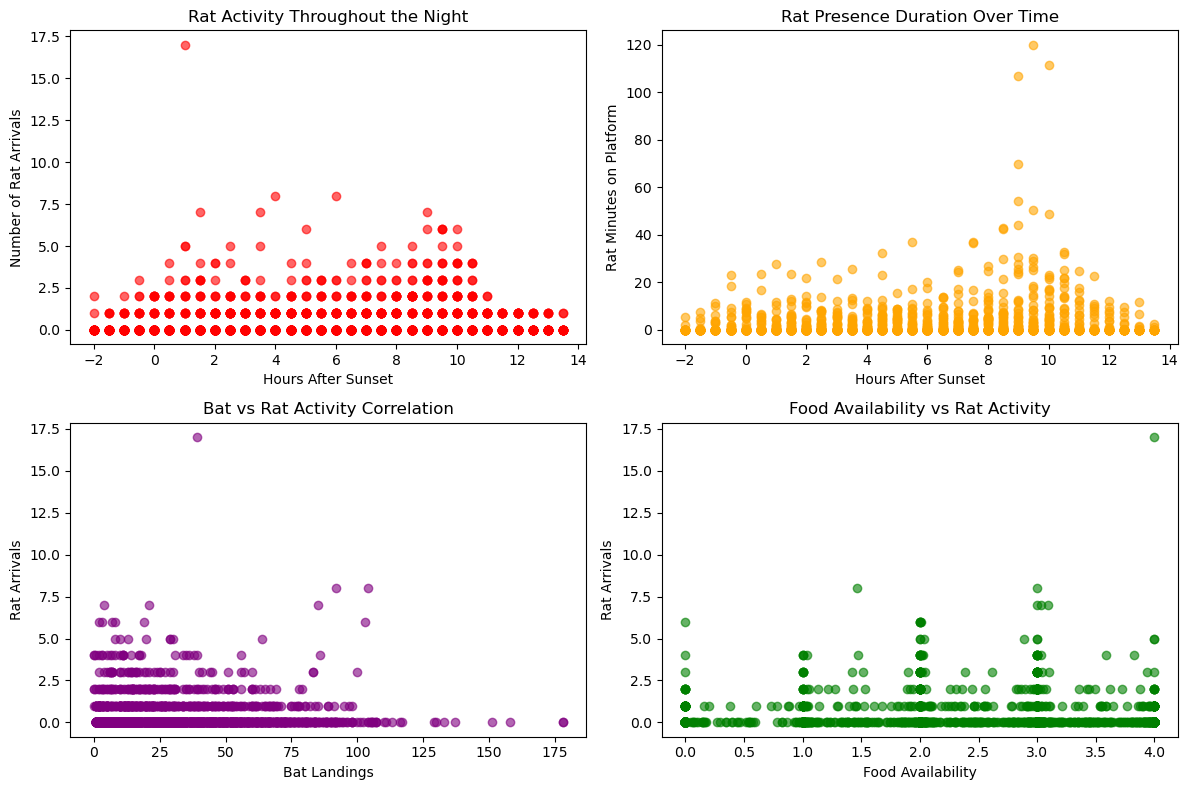


=== COMPETITION INTENSITY ANALYSIS ===


/tmp/ipykernel_19293/4037433442.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_bats_by_competition = df2.groupby('competition_level')['bat_landing_number'].mean()


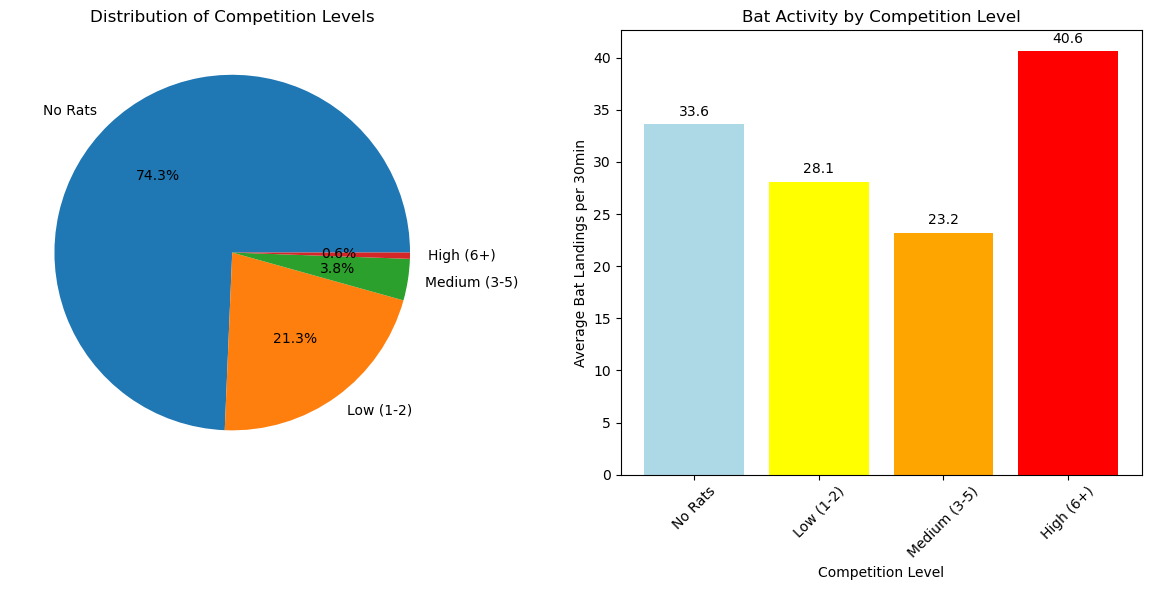


=== TEMPORAL PATTERNS ANALYSIS ===


/tmp/ipykernel_19293/4037433442.py:100: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_rats = df2.groupby('hour_bins')['rat_arrival_number'].mean()
/tmp/ipykernel_19293/4037433442.py:107: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_bats = df2.groupby('hour_bins')['bat_landing_number'].mean()
/tmp/ipykernel_19293/4037433442.py:114: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_food = df2.groupby('hou

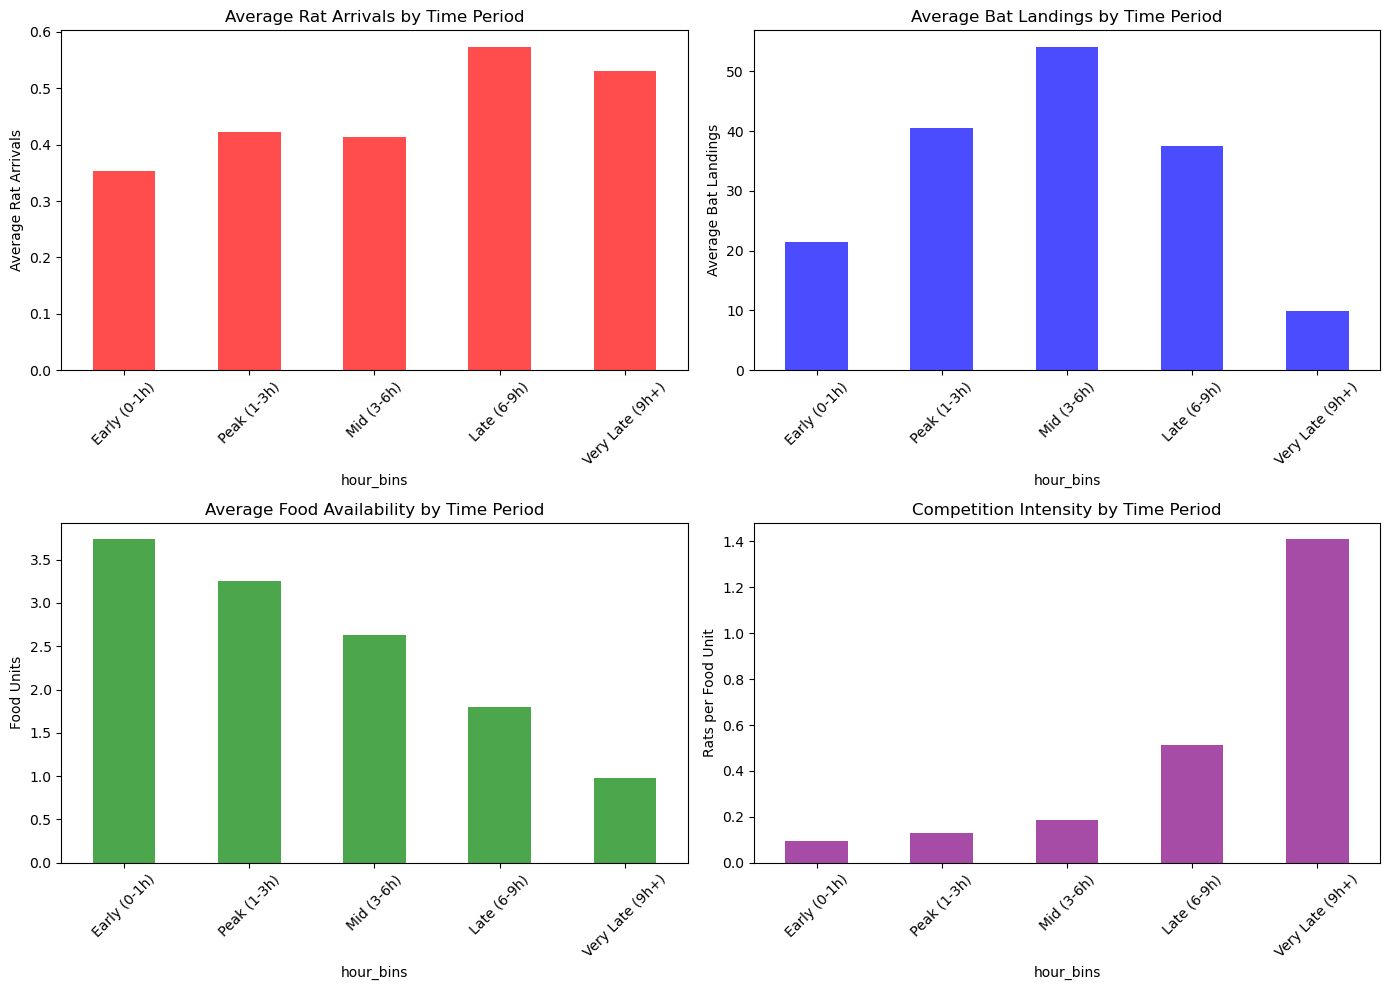


=== CORRELATIONS IN DATASET 2 ===


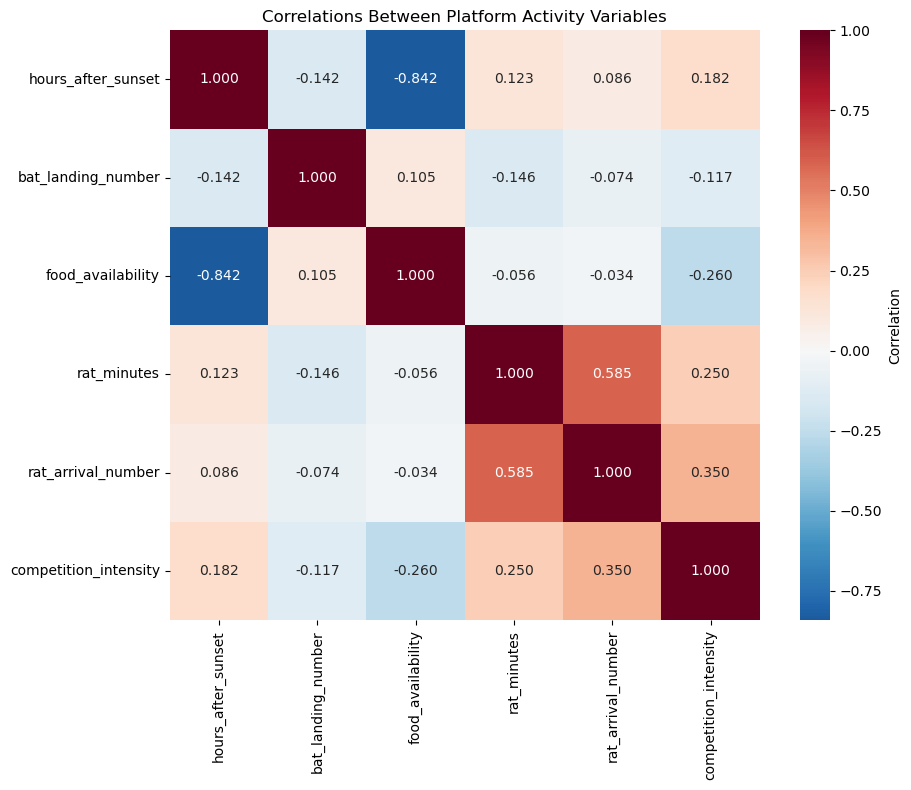


=== KEY STATISTICAL INSIGHTS ===
Bat-Rat activity correlation: r = -0.074, p = 0.001
Food-Rat activity correlation: r = -0.034, p = 0.121
Time-Rat activity correlation: r = 0.086, p = 0.000

ANOVA - Bat activity by competition level:
F-statistic: 9.222, p-value: 0.000
★ SIGNIFICANT: Bat activity differs by competition level

=== ACTIVITY BY COMPETITION LEVEL ===
                  bat_landing_number              food_availability  \
                                mean    std count              mean   
competition_level                                                     
No Rats                        33.61  26.47  1578              2.50   
Low (1-2)                      28.11  21.68   453              2.29   
Medium (3-5)                   23.22  21.59    80              2.35   
High (6+)                      40.58  42.44    12              2.30   

                  rat_minutes  
                         mean  
competition_level              
No Rats                  0.00  
Low (1-2

/tmp/ipykernel_19293/4037433442.py:175: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  competition_summary = df2.groupby('competition_level').agg({


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load both datasets (assuming df1 and df2 are already loaded and cleaned)
# df1 = pd.read_csv('dataset1.csv')  # Individual bat landings
# df2 = pd.read_csv('dataset2.csv')  # 30-minute observation periods

print("=== COMBINED DATASET ANALYSIS ===")
print(f"Dataset 1 shape: {df.shape} (individual bat landings)")
print(f"Dataset 2 shape: {df2.shape} (30-min observation periods)")

# DATASET 2 EXPLORATION
print("\n=== DATASET 2 EXPLORATION ===")
print("Dataset 2 sample:")
print(df2.head())
print("\nDataset 2 summary:")
print(df2.describe())

# ANALYSIS 1: RAT ACTIVITY PATTERNS FROM DATASET 2
print("\n=== RAT ACTIVITY ANALYSIS (Dataset 2) ===")

# Chart 1: Rat Activity Over Time
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(df2['hours_after_sunset'], df2['rat_arrival_number'], alpha=0.6, color='red')
plt.xlabel('Hours After Sunset')
plt.ylabel('Number of Rat Arrivals')
plt.title('Rat Activity Throughout the Night')

plt.subplot(2, 2, 2)
plt.scatter(df2['hours_after_sunset'], df2['rat_minutes'], alpha=0.6, color='orange')
plt.xlabel('Hours After Sunset')
plt.ylabel('Rat Minutes on Platform')
plt.title('Rat Presence Duration Over Time')

plt.subplot(2, 2, 3)
plt.scatter(df2['bat_landing_number'], df2['rat_arrival_number'], alpha=0.6, color='purple')
plt.xlabel('Bat Landings')
plt.ylabel('Rat Arrivals')
plt.title('Bat vs Rat Activity Correlation')

plt.subplot(2, 2, 4)
plt.scatter(df2['food_availability'], df2['rat_arrival_number'], alpha=0.6, color='green')
plt.xlabel('Food Availability')
plt.ylabel('Rat Arrivals')
plt.title('Food Availability vs Rat Activity')

plt.tight_layout()
plt.show()

# ANALYSIS 2: COMPETITION INTENSITY ANALYSIS
print("\n=== COMPETITION INTENSITY ANALYSIS ===")

# Create competition intensity metrics from dataset 2
df2['competition_intensity'] = df2['rat_arrival_number'] / (df2['food_availability'] + 0.1)  # Avoid division by zero
df2['rat_pressure'] = df2['rat_minutes'] / 30  # Proportion of time rats were present

# Categorize competition levels
df2['competition_level'] = pd.cut(df2['rat_arrival_number'], 
                                 bins=[-1, 0, 2, 5, float('inf')], 
                                 labels=['No Rats', 'Low (1-2)', 'Medium (3-5)', 'High (6+)'])

# Chart: Competition levels throughout the night
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
competition_counts = df2['competition_level'].value_counts()
plt.pie(competition_counts.values, labels=competition_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Competition Levels')

plt.subplot(1, 2, 2)
avg_bats_by_competition = df2.groupby('competition_level')['bat_landing_number'].mean()
bars = plt.bar(range(len(avg_bats_by_competition)), avg_bats_by_competition.values, 
               color=['lightblue', 'yellow', 'orange', 'red'])
plt.xlabel('Competition Level')
plt.ylabel('Average Bat Landings per 30min')
plt.title('Bat Activity by Competition Level')
plt.xticks(range(len(avg_bats_by_competition)), avg_bats_by_competition.index, rotation=45)
for bar, value in zip(bars, avg_bats_by_competition.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value:.1f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# ANALYSIS 3: TEMPORAL PATTERNS
print("\n=== TEMPORAL PATTERNS ANALYSIS ===")

# Chart: Activity patterns by time of night
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
# Bin hours for better visualization
df2['hour_bins'] = pd.cut(df2['hours_after_sunset'], 
                         bins=[-1, 1, 3, 6, 9, float('inf')], 
                         labels=['Early (0-1h)', 'Peak (1-3h)', 'Mid (3-6h)', 'Late (6-9h)', 'Very Late (9h+)'])
hourly_rats = df2.groupby('hour_bins')['rat_arrival_number'].mean()
hourly_rats.plot(kind='bar', color='red', alpha=0.7)
plt.title('Average Rat Arrivals by Time Period')
plt.ylabel('Average Rat Arrivals')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
hourly_bats = df2.groupby('hour_bins')['bat_landing_number'].mean()
hourly_bats.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Average Bat Landings by Time Period')
plt.ylabel('Average Bat Landings')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
hourly_food = df2.groupby('hour_bins')['food_availability'].mean()
hourly_food.plot(kind='bar', color='green', alpha=0.7)
plt.title('Average Food Availability by Time Period')
plt.ylabel('Food Units')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
# Competition intensity over time
hourly_competition = df2.groupby('hour_bins')['competition_intensity'].mean()
hourly_competition.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Competition Intensity by Time Period')
plt.ylabel('Rats per Food Unit')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# ANALYSIS 4: CORRELATIONS IN DATASET 2
print("\n=== CORRELATIONS IN DATASET 2 ===")

plt.figure(figsize=(10, 8))
# Select numeric columns for correlation
correlation_cols = ['hours_after_sunset', 'bat_landing_number', 'food_availability', 
                   'rat_minutes', 'rat_arrival_number', 'competition_intensity']
corr_matrix = df2[correlation_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation'})
plt.title('Correlations Between Platform Activity Variables')
plt.tight_layout()
plt.show()

# STATISTICAL INSIGHTS
print("\n=== KEY STATISTICAL INSIGHTS ===")

# Correlation tests
bat_rat_corr, p_bat_rat = stats.pearsonr(df2['bat_landing_number'], df2['rat_arrival_number'])
food_rat_corr, p_food_rat = stats.pearsonr(df2['food_availability'], df2['rat_arrival_number'])
time_rat_corr, p_time_rat = stats.pearsonr(df2['hours_after_sunset'], df2['rat_arrival_number'])

print(f"Bat-Rat activity correlation: r = {bat_rat_corr:.3f}, p = {p_bat_rat:.3f}")
print(f"Food-Rat activity correlation: r = {food_rat_corr:.3f}, p = {p_food_rat:.3f}")
print(f"Time-Rat activity correlation: r = {time_rat_corr:.3f}, p = {p_time_rat:.3f}")

# Test if bat activity differs by competition level
competition_groups = [df2[df2['competition_level'] == level]['bat_landing_number'].dropna() 
                     for level in df2['competition_level'].cat.categories if 
                     len(df2[df2['competition_level'] == level]) > 0]

if len(competition_groups) > 2:
    f_stat, p_anova = stats.f_oneway(*competition_groups)
    print(f"\nANOVA - Bat activity by competition level:")
    print(f"F-statistic: {f_stat:.3f}, p-value: {p_anova:.3f}")
    
    if p_anova < 0.05:
        print("★ SIGNIFICANT: Bat activity differs by competition level")
    else:
        print("✗ NOT SIGNIFICANT: No difference in bat activity by competition level")

# Summary statistics by competition level
print("\n=== ACTIVITY BY COMPETITION LEVEL ===")
competition_summary = df2.groupby('competition_level').agg({
    'bat_landing_number': ['mean', 'std', 'count'],
    'food_availability': 'mean',
    'rat_minutes': 'mean'
}).round(2)
print(competition_summary)

print("\n=== EVIDENCE FROM DATASET 2 ===")
print("Supporting predator hypothesis if:")
print("✓ Negative correlation between bat and rat activity")
print("✓ Reduced bat activity when competition is high")
print("✓ Bats avoid times/conditions with high rat presence")

BAT-RAT PREDATOR HYPOTHESIS ANALYSIS
Dataset loaded successfully: 907 observations, 12 variables
Date range: 2017-12-26 to 2018-05-31

DATA QUALITY ASSESSMENT

Dataset Overview:
• Total observations: 907
• Missing values in key variables:
  - bat_landing_to_food: 0 (0.0%)
  - risk: 0 (0.0%)
  - reward: 0 (0.0%)
  - habit: 0 (0.0%)

Unique landing contexts identified: 81

Landing Context Classification:
• Fast Movement: 256 observations (28.2%)
• Rat Present: 245 observations (27.0%)
• Food Picking: 164 observations (18.1%)
• Bat Only: 116 observations (12.8%)
• Other Context: 109 observations (12.0%)
• Unknown: 17 observations (1.9%)

BEHAVIORAL MEASURES SUMMARY

Vigilance Measure (Time to Approach Food):
• Mean approach time: 9.48 seconds
• Median approach time: 4.00 seconds
• Standard deviation: 15.36 seconds
• Range: 0.0 - 120.0 seconds

Risk-Taking Behavior:
• Risk-taking instances: 449 out of 907 observations
• Risk-taking rate: 0.495 (49.5%)
• Risk-avoidance rate: 50.5%

Foraging

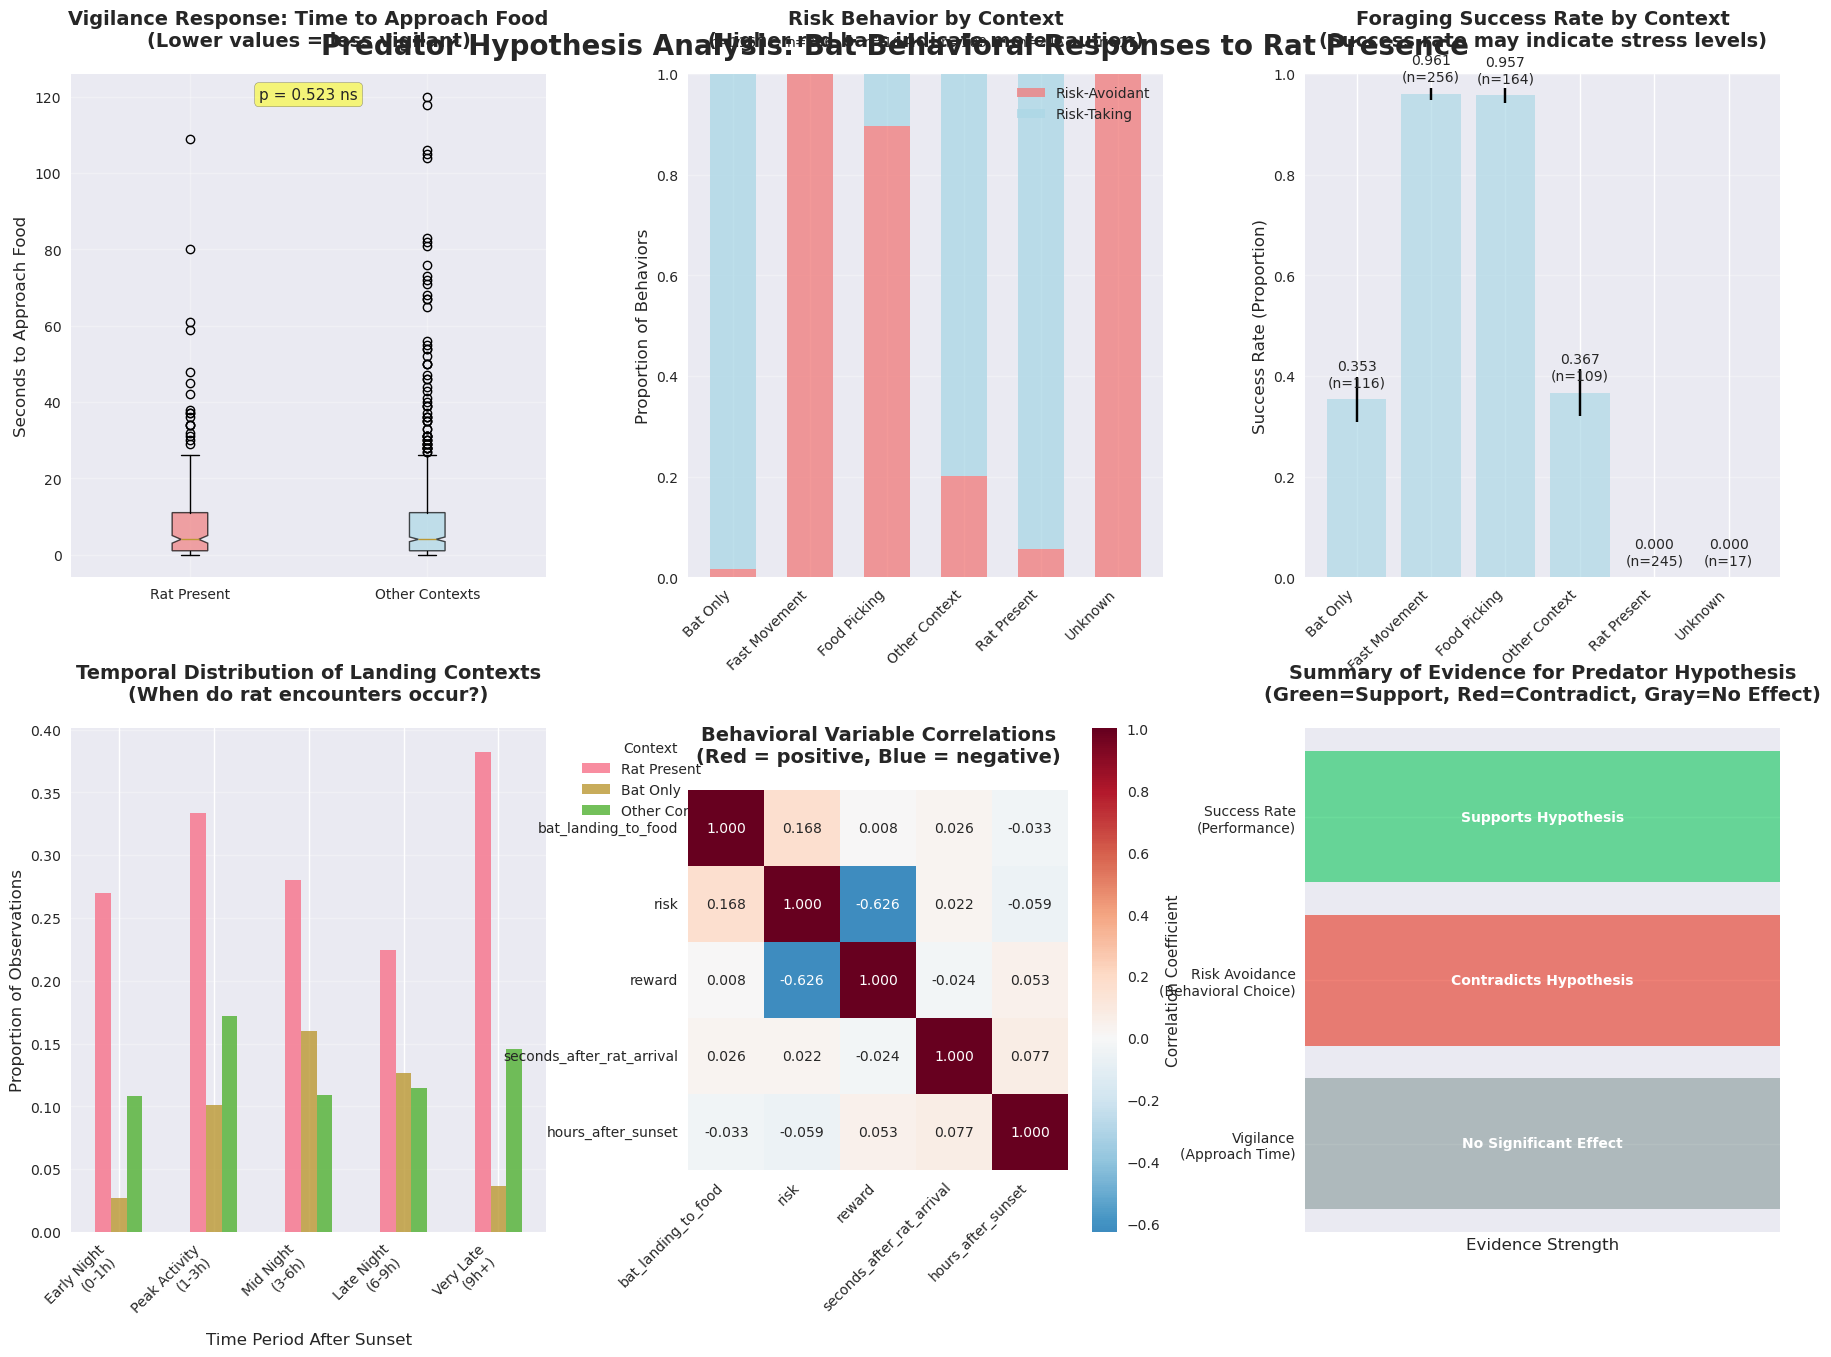


COMPREHENSIVE ANALYSIS CONCLUSIONS

Detailed Evidence Assessment:
----------------------------------------

1. VIGILANCE TEST (Approach Time Analysis):
   • Statistical significance: p = 0.523
   • Effect size (Cohen's d): -0.048
   ⚬ INCONCLUSIVE: No significant difference in vigilance behavior

2. RISK AVOIDANCE TEST (Behavioral Choice Analysis):
   • Statistical significance: p = 0.000
   • Effect size (Cramer's V): 0.542
   ✗ CONTRADICTS HYPOTHESIS: Lower risk-avoidance when rats are present
   → Risk-avoidance rate: 5.7% (rat contexts) vs 67.1% (other contexts)

3. FORAGING SUCCESS TEST (Performance Analysis):
   • Statistical significance: p = 0.000
   ✓ SUPPORTS HYPOTHESIS: Lower success rate when rats are present
   → Success rates: 0.0% (rat contexts) vs 73.1% (other contexts)
   → Reduced performance may indicate stress or distraction from predator presence

FINAL SCIENTIFIC CONCLUSION

Evidence Summary: 1/3 tests support the predator hypothesis

⚠️ MODERATE EVIDENCE

    Th

In [14]:
# %%
"""
Bat vs. Rat: Predator Hypothesis Analysis
=========================================

This analysis investigates whether Egyptian Fruit Bats (Rousettus aegyptiacus) 
perceive Black Rats (Rattus rattus) as potential predators during foraging.

Research Question: Do bats perceive rats not just as competitors for food 
but also as potential predators?

Expected Evidence:
- Increased vigilance (longer approach times) when rats are present
- More risk-avoidant behavior in rat contexts
- Reduced overall platform activity when rats are present
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for professional appearance
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# %%
# ===================================================================
# DATA LOADING AND PREPROCESSING
# ===================================================================

print("=" * 70)
print("BAT-RAT PREDATOR HYPOTHESIS ANALYSIS")
print("=" * 70)

# Load the dataset
df = pd.read_csv(r'/mnt/e/Foundation of Data Science/ass 1/dataset1.csv', engine='pyarrow')

# Convert datetime columns with proper error handling
datetime_columns = ['rat_period_start', 'rat_period_end', 'sunset_time', 'start_time']
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col], format='%d/%m/%Y %H:%M', errors='coerce')

print(f"Dataset loaded successfully: {df.shape[0]} observations, {df.shape[1]} variables")
print(f"Date range: {df['start_time'].min().strftime('%Y-%m-%d')} to {df['start_time'].max().strftime('%Y-%m-%d')}")

# %%
# ===================================================================
# DATA QUALITY ASSESSMENT
# ===================================================================

print("\n" + "=" * 50)
print("DATA QUALITY ASSESSMENT")
print("=" * 50)

# Handle missing values in habit column using forward fill
df['habit'] = df['habit'].fillna(method='ffill')

# Display basic dataset information
print(f"\nDataset Overview:")
print(f"• Total observations: {len(df):,}")
print(f"• Missing values in key variables:")
for col in ['bat_landing_to_food', 'risk', 'reward', 'habit']:
    missing_count = df[col].isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    print(f"  - {col}: {missing_count} ({missing_percent:.1f}%)")

print(f"\nUnique landing contexts identified: {df['habit'].nunique()}")

# %%
# ===================================================================
# BEHAVIORAL CONTEXT CLASSIFICATION
# ===================================================================

def classify_landing_context(habit_description):
    """
    Classify landing contexts into meaningful categories for analysis.
    
    This function standardizes the diverse habitat descriptions into 
    clear categories that can be used for statistical analysis.
    """
    if pd.isna(habit_description):
        return 'Unknown'
    
    description = str(habit_description).lower()
    
    # Primary classification logic
    if 'rat' in description and 'bat' not in description and 'pick' not in description:
        return 'Rat Present'
    elif 'bat' in description and 'rat' not in description:
        return 'Bat Only'
    elif 'pick' in description and 'rat' not in description:
        return 'Food Picking'
    elif 'fast' in description:
        return 'Fast Movement'
    elif any(char.isdigit() for char in description):  # Filter out coordinate data
        return 'Unknown'
    else:
        return 'Other Context'

# Apply context classification
df['context'] = df['habit'].apply(classify_landing_context)

print("\nLanding Context Classification:")
context_counts = df['context'].value_counts()
for context, count in context_counts.items():
    percentage = (count / len(df)) * 100
    print(f"• {context}: {count:,} observations ({percentage:.1f}%)")

# %%
# ===================================================================
# DESCRIPTIVE STATISTICS: BEHAVIORAL MEASURES
# ===================================================================

print("\n" + "=" * 50)
print("BEHAVIORAL MEASURES SUMMARY")
print("=" * 50)

# Remove extreme outliers for more reliable statistics (>99th percentile)
approach_time_threshold = df['bat_landing_to_food'].quantile(0.99)
df_clean = df[df['bat_landing_to_food'] <= approach_time_threshold].copy()

print(f"\nVigilance Measure (Time to Approach Food):")
print(f"• Mean approach time: {df_clean['bat_landing_to_food'].mean():.2f} seconds")
print(f"• Median approach time: {df_clean['bat_landing_to_food'].median():.2f} seconds")
print(f"• Standard deviation: {df_clean['bat_landing_to_food'].std():.2f} seconds")
print(f"• Range: {df_clean['bat_landing_to_food'].min():.1f} - {df_clean['bat_landing_to_food'].max():.1f} seconds")

print(f"\nRisk-Taking Behavior:")
risk_rate = df['risk'].mean()
print(f"• Risk-taking instances: {df['risk'].sum():,} out of {len(df):,} observations")
print(f"• Risk-taking rate: {risk_rate:.3f} ({risk_rate*100:.1f}%)")
print(f"• Risk-avoidance rate: {(1-risk_rate)*100:.1f}%")

print(f"\nForaging Success:")
success_rate = df['reward'].mean()
print(f"• Successful foraging attempts: {df['reward'].sum():,} out of {len(df):,}")
print(f"• Overall success rate: {success_rate:.3f} ({success_rate*100:.1f}%)")

# %%
# ===================================================================
# PREDATOR HYPOTHESIS: STATISTICAL ANALYSIS
# ===================================================================

print("\n" + "=" * 50)
print("PREDATOR HYPOTHESIS: STATISTICAL TESTING")
print("=" * 50)

# Separate data by context for comparison
rat_context = df_clean[df_clean['context'] == 'Rat Present']
non_rat_context = df_clean[df_clean['context'] != 'Rat Present']

print(f"\nSample sizes for analysis:")
print(f"• Rat present contexts: {len(rat_context):,} observations")
print(f"• Non-rat contexts: {len(non_rat_context):,} observations")

# ===================================================================
# TEST 1: VIGILANCE HYPOTHESIS (Approach Time Analysis)
# ===================================================================

print(f"\n{'='*40}")
print("TEST 1: VIGILANCE HYPOTHESIS")
print("H₀: No difference in approach times between contexts")
print("H₁: Bats show increased vigilance (longer approach times) when rats are present")
print("="*40)

if len(rat_context) > 10 and len(non_rat_context) > 10:
    # Perform independent t-test
    t_statistic, p_value_vigilance = stats.ttest_ind(
        rat_context['bat_landing_to_food'], 
        non_rat_context['bat_landing_to_food']
    )
    
    # Calculate effect size (Cohen's d)
    pooled_std = np.sqrt(((len(rat_context)-1) * rat_context['bat_landing_to_food'].var() + 
                         (len(non_rat_context)-1) * non_rat_context['bat_landing_to_food'].var()) / 
                        (len(rat_context) + len(non_rat_context) - 2))
    cohens_d = (rat_context['bat_landing_to_food'].mean() - 
                non_rat_context['bat_landing_to_food'].mean()) / pooled_std
    
    print(f"Results:")
    print(f"• Rat present: Mean = {rat_context['bat_landing_to_food'].mean():.2f}s (SD = {rat_context['bat_landing_to_food'].std():.2f})")
    print(f"• Non-rat contexts: Mean = {non_rat_context['bat_landing_to_food'].mean():.2f}s (SD = {non_rat_context['bat_landing_to_food'].std():.2f})")
    print(f"• t-statistic = {t_statistic:.3f}")
    print(f"• p-value = {p_value_vigilance:.3f}")
    print(f"• Effect size (Cohen's d) = {cohens_d:.3f}")
    
    if p_value_vigilance < 0.05:
        if rat_context['bat_landing_to_food'].mean() > non_rat_context['bat_landing_to_food'].mean():
            print("★ SIGNIFICANT: Bats show INCREASED vigilance in rat contexts (supports predator hypothesis)")
        else:
            print("★ SIGNIFICANT: Bats show DECREASED vigilance in rat contexts (contradicts predator hypothesis)")
    else:
        print("✗ NOT SIGNIFICANT: No difference in vigilance between contexts")
else:
    print("⚠ Insufficient sample size for reliable t-test")

# ===================================================================
# TEST 2: RISK AVOIDANCE HYPOTHESIS
# ===================================================================

print(f"\n{'='*40}")
print("TEST 2: RISK AVOIDANCE HYPOTHESIS")
print("H₀: Risk behavior is independent of context")
print("H₁: Bats show more risk-avoidant behavior when rats are present")
print("="*40)

# Create contingency table for chi-square test
contingency_table = pd.crosstab(df['context'] == 'Rat Present', df['risk'])

print("Contingency Table:")
print("Context          Risk-Avoidant  Risk-Taking   Total")
print("="*50)
for i, (index, row) in enumerate(contingency_table.iterrows()):
    context_name = "Rat Present" if index else "Other Contexts"
    total = row.sum()
    print(f"{context_name:<15} {row[0]:>8} {row[1]:>12} {total:>8}")

# Perform chi-square test
chi2_statistic, p_value_risk, dof, expected = stats.chi2_contingency(contingency_table)

# Calculate effect size (Cramer's V)
n_total = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2_statistic / (n_total * (min(contingency_table.shape) - 1)))

print(f"\nStatistical Results:")
print(f"• χ² statistic = {chi2_statistic:.3f}")
print(f"• p-value = {p_value_risk:.3f}")
print(f"• Degrees of freedom = {dof}")
print(f"• Effect size (Cramer's V) = {cramers_v:.3f}")

if p_value_risk < 0.05:
    # Calculate risk-avoidance rates by context
    rat_risk_avoidance = (1 - df[df['context'] == 'Rat Present']['risk'].mean()) * 100
    other_risk_avoidance = (1 - df[df['context'] != 'Rat Present']['risk'].mean()) * 100
    
    print("★ SIGNIFICANT: Risk behavior differs between contexts")
    print(f"• Risk-avoidance rate (Rat Present): {rat_risk_avoidance:.1f}%")
    print(f"• Risk-avoidance rate (Other Contexts): {other_risk_avoidance:.1f}%")
    
    if rat_risk_avoidance > other_risk_avoidance:
        print("→ Supports predator hypothesis: More risk-avoidant behavior with rats")
    else:
        print("→ Contradicts predator hypothesis: Less risk-avoidant behavior with rats")
else:
    print("✗ NOT SIGNIFICANT: No association between context and risk behavior")

# ===================================================================
# TEST 3: SUCCESS RATE COMPARISON
# ===================================================================

print(f"\n{'='*40}")
print("TEST 3: FORAGING SUCCESS ANALYSIS")
print("H₀: Success rate is equal across contexts")
print("H₁: Success rate differs between rat and non-rat contexts")
print("="*40)

rat_success_data = df[df['context'] == 'Rat Present']['reward']
other_success_data = df[df['context'] != 'Rat Present']['reward']

if len(rat_success_data) > 10 and len(other_success_data) > 10:
    # Two-proportion z-test
    successes_rat = rat_success_data.sum()
    successes_other = other_success_data.sum()
    n_rat = len(rat_success_data)
    n_other = len(other_success_data)
    
    p_rat = successes_rat / n_rat
    p_other = successes_other / n_other
    p_pooled = (successes_rat + successes_other) / (n_rat + n_other)
    
    # Calculate z-statistic
    se = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_rat + 1/n_other))
    z_statistic = (p_rat - p_other) / se
    p_value_success = 2 * (1 - stats.norm.cdf(abs(z_statistic)))
    
    print(f"Success Rate Analysis:")
    print(f"• Rat Present: {successes_rat}/{n_rat} = {p_rat:.3f} ({p_rat*100:.1f}%)")
    print(f"• Other Contexts: {successes_other}/{n_other} = {p_other:.3f} ({p_other*100:.1f}%)")
    print(f"• z-statistic = {z_statistic:.3f}")
    print(f"• p-value = {p_value_success:.3f}")
    
    if p_value_success < 0.05:
        print("★ SIGNIFICANT: Success rates differ between contexts")
        if p_rat < p_other:
            print("→ Lower success rate with rats present (supports predator hypothesis)")
        else:
            print("→ Higher success rate with rats present (contradicts predator hypothesis)")
    else:
        print("✗ NOT SIGNIFICANT: No difference in success rates")

# %%
# ===================================================================
# COMPREHENSIVE VISUALIZATION
# ===================================================================

print(f"\n{'='*50}")
print("GENERATING COMPREHENSIVE VISUALIZATIONS")
print("="*50)

# Create a comprehensive figure with multiple subplots
fig = plt.figure(figsize=(18, 14))
fig.suptitle('Predator Hypothesis Analysis: Bat Behavioral Responses to Rat Presence', 
             fontsize=20, fontweight='bold', y=0.95)

# ===================================================================
# Chart 1: Vigilance Comparison (Box Plot)
# ===================================================================
ax1 = plt.subplot(2, 3, 1)
vigilance_data = [rat_context['bat_landing_to_food'], non_rat_context['bat_landing_to_food']]
box_plot = ax1.boxplot(vigilance_data, labels=['Rat Present', 'Other Contexts'], 
                       patch_artist=True, notch=True)

# Color the boxes
colors = ['lightcoral', 'lightblue']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_title('Vigilance Response: Time to Approach Food\n(Lower values = less vigilant)', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_ylabel('Seconds to Approach Food', fontsize=12)
ax1.grid(True, alpha=0.3)

# Add statistical annotation
if 'p_value_vigilance' in locals():
    significance = "***" if p_value_vigilance < 0.001 else "**" if p_value_vigilance < 0.01 else "*" if p_value_vigilance < 0.05 else "ns"
    ax1.text(0.5, 0.95, f'p = {p_value_vigilance:.3f} {significance}', 
             transform=ax1.transAxes, ha='center', fontsize=11, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))

# ===================================================================
# Chart 2: Risk Behavior Distribution
# ===================================================================
ax2 = plt.subplot(2, 3, 2)
risk_by_context = df.groupby('context')['risk'].agg(['mean', 'count']).reset_index()
risk_by_context = risk_by_context[risk_by_context['count'] >= 10]  # Filter contexts with sufficient data

# Create stacked bar chart showing risk-avoidance vs risk-taking
risk_avoidance = 1 - risk_by_context['mean']
risk_taking = risk_by_context['mean']

x_pos = range(len(risk_by_context))
width = 0.6

bars1 = ax2.bar(x_pos, risk_avoidance, width, label='Risk-Avoidant', 
                color='lightcoral', alpha=0.8)
bars2 = ax2.bar(x_pos, risk_taking, width, bottom=risk_avoidance, 
                label='Risk-Taking', color='lightblue', alpha=0.8)

ax2.set_title('Risk Behavior by Context\n(Higher red bars indicate more caution)', 
              fontsize=14, fontweight='bold', pad=20)
ax2.set_ylabel('Proportion of Behaviors', fontsize=12)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(risk_by_context['context'], rotation=45, ha='right')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3, axis='y')

# Add sample size annotations
for i, (bar1, bar2, count) in enumerate(zip(bars1, bars2, risk_by_context['count'])):
    ax2.text(bar1.get_x() + bar1.get_width()/2, 1.05, f'n={count}', 
             ha='center', va='bottom', fontsize=10)

# ===================================================================
# Chart 3: Success Rate Comparison
# ===================================================================
ax3 = plt.subplot(2, 3, 3)
success_by_context = df.groupby('context')['reward'].agg(['mean', 'count', 'std']).reset_index()
success_by_context = success_by_context[success_by_context['count'] >= 10]

# Calculate standard errors for error bars
success_by_context['se'] = success_by_context['std'] / np.sqrt(success_by_context['count'])

bars = ax3.bar(range(len(success_by_context)), success_by_context['mean'], 
               yerr=success_by_context['se'], capsize=5, alpha=0.7,
               color=['lightcoral' if 'Rat' in ctx else 'lightblue' for ctx in success_by_context['context']])

ax3.set_title('Foraging Success Rate by Context\n(Success rate may indicate stress levels)', 
              fontsize=14, fontweight='bold', pad=20)
ax3.set_ylabel('Success Rate (Proportion)', fontsize=12)
ax3.set_xticks(range(len(success_by_context)))
ax3.set_xticklabels(success_by_context['context'], rotation=45, ha='right')
ax3.set_ylim(0, 1)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, mean_val, count in zip(bars, success_by_context['mean'], success_by_context['count']):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{mean_val:.3f}\n(n={count})', ha='center', va='bottom', fontsize=10)

# ===================================================================
# Chart 4: Temporal Analysis - Activity Over Time
# ===================================================================
ax4 = plt.subplot(2, 3, 4)
# Create hourly bins for analysis
df['hour_bins'] = pd.cut(df['hours_after_sunset'], 
                        bins=[-1, 1, 3, 6, 9, float('inf')], 
                        labels=['Early Night\n(0-1h)', 'Peak Activity\n(1-3h)', 
                               'Mid Night\n(3-6h)', 'Late Night\n(6-9h)', 'Very Late\n(9h+)'])

hourly_stats = df.groupby(['hour_bins', 'context']).size().unstack(fill_value=0)
hourly_stats_prop = hourly_stats.div(hourly_stats.sum(axis=1), axis=0)

# Focus on main contexts for clarity
main_contexts = ['Rat Present', 'Bat Only', 'Other Context']
available_contexts = [ctx for ctx in main_contexts if ctx in hourly_stats_prop.columns]

if available_contexts:
    hourly_stats_prop[available_contexts].plot(kind='bar', ax=ax4, alpha=0.8)
    ax4.set_title('Temporal Distribution of Landing Contexts\n(When do rat encounters occur?)', 
                  fontsize=14, fontweight='bold', pad=20)
    ax4.set_ylabel('Proportion of Observations', fontsize=12)
    ax4.set_xlabel('Time Period After Sunset', fontsize=12)
    ax4.legend(title='Context', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax4.grid(True, alpha=0.3, axis='y')
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')

# ===================================================================
# Chart 5: Correlation Matrix
# ===================================================================
ax5 = plt.subplot(2, 3, 5)
# Select key variables for correlation analysis
correlation_vars = ['bat_landing_to_food', 'risk', 'reward', 'seconds_after_rat_arrival', 'hours_after_sunset']
available_vars = [var for var in correlation_vars if var in df.columns]

if len(available_vars) >= 3:
    corr_matrix = df[available_vars].corr()
    
    # Create heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, square=True, 
                fmt='.3f', ax=ax5, cbar_kws={'label': 'Correlation Coefficient'})
    ax5.set_title('Behavioral Variable Correlations\n(Red = positive, Blue = negative)', 
                  fontsize=14, fontweight='bold', pad=20)
    plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45, ha='right')
    plt.setp(ax5.yaxis.get_majorticklabels(), rotation=0)

# ===================================================================
# Chart 6: Evidence Summary
# ===================================================================
ax6 = plt.subplot(2, 3, 6)

# Collect evidence from all tests
evidence_tests = []
evidence_results = []
evidence_colors = []

if 'p_value_vigilance' in locals():
    evidence_tests.append('Vigilance\n(Approach Time)')
    if p_value_vigilance < 0.05 and rat_context['bat_landing_to_food'].mean() > non_rat_context['bat_landing_to_food'].mean():
        evidence_results.append('Supports Hypothesis')
        evidence_colors.append('green')
    elif p_value_vigilance < 0.05:
        evidence_results.append('Contradicts Hypothesis')
        evidence_colors.append('red')
    else:
        evidence_results.append('No Significant Effect')
        evidence_colors.append('gray')

if 'p_value_risk' in locals():
    evidence_tests.append('Risk Avoidance\n(Behavioral Choice)')
    if p_value_risk < 0.05:
        rat_risk_avoid = (1 - df[df['context'] == 'Rat Present']['risk'].mean())
        other_risk_avoid = (1 - df[df['context'] != 'Rat Present']['risk'].mean())
        if rat_risk_avoid > other_risk_avoid:
            evidence_results.append('Supports Hypothesis')
            evidence_colors.append('green')
        else:
            evidence_results.append('Contradicts Hypothesis')
            evidence_colors.append('red')
    else:
        evidence_results.append('No Significant Effect')
        evidence_colors.append('gray')

if 'p_value_success' in locals():
    evidence_tests.append('Success Rate\n(Performance)')
    if p_value_success < 0.05:
        if p_rat < p_other:
            evidence_results.append('Supports Hypothesis')
            evidence_colors.append('green')
        else:
            evidence_results.append('Contradicts Hypothesis')
            evidence_colors.append('red')
    else:
        evidence_results.append('No Significant Effect')
        evidence_colors.append('gray')

# Create evidence summary chart
if evidence_tests:
    y_pos = range(len(evidence_tests))
    colors_map = {'green': '#2ecc71', 'red': '#e74c3c', 'gray': '#95a5a6'}
    bar_colors = [colors_map[color] for color in evidence_colors]
    
    bars = ax6.barh(y_pos, [1]*len(evidence_tests), color=bar_colors, alpha=0.7)
    ax6.set_yticks(y_pos)
    ax6.set_yticklabels(evidence_tests)
    ax6.set_xlabel('Evidence Strength', fontsize=12)
    ax6.set_title('Summary of Evidence for Predator Hypothesis\n(Green=Support, Red=Contradict, Gray=No Effect)', 
                  fontsize=14, fontweight='bold', pad=20)
    ax6.set_xlim(0, 1)
    ax6.set_xticks([])
    
    # Add result labels
    for bar, result in zip(bars, evidence_results):
        ax6.text(bar.get_width()/2, bar.get_y() + bar.get_height()/2, result, 
                ha='center', va='center', fontweight='bold', color='white')

plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.3, wspace=0.3)
plt.show()

# %%
# ===================================================================
# COMPREHENSIVE CONCLUSIONS
# ===================================================================

print("\n" + "=" * 70)
print("COMPREHENSIVE ANALYSIS CONCLUSIONS")
print("=" * 70)

# Count supporting evidence
supporting_evidence = 0
total_tests = 0

print("\nDetailed Evidence Assessment:")
print("-" * 40)

if 'p_value_vigilance' in locals():
    total_tests += 1
    print(f"\n1. VIGILANCE TEST (Approach Time Analysis):")
    print(f"   • Statistical significance: p = {p_value_vigilance:.3f}")
    print(f"   • Effect size (Cohen's d): {cohens_d:.3f}")
    
    if p_value_vigilance < 0.05 and rat_context['bat_landing_to_food'].mean() > non_rat_context['bat_landing_to_food'].mean():
        supporting_evidence += 1
        print("   ✓ SUPPORTS HYPOTHESIS: Bats show increased vigilance (longer approach times) when rats are present")
        print("   → This suggests bats perceive rats as a threat requiring caution")
    elif p_value_vigilance < 0.05:
        print("   ✗ CONTRADICTS HYPOTHESIS: Bats show decreased vigilance when rats are present")
        print("   → This suggests bats do not perceive rats as threatening")
    else:
        print("   ⚬ INCONCLUSIVE: No significant difference in vigilance behavior")

if 'p_value_risk' in locals():
    total_tests += 1
    print(f"\n2. RISK AVOIDANCE TEST (Behavioral Choice Analysis):")
    print(f"   • Statistical significance: p = {p_value_risk:.3f}")
    print(f"   • Effect size (Cramer's V): {cramers_v:.3f}")
    
    if p_value_risk < 0.05:
        rat_avoid_rate = (1 - df[df['context'] == 'Rat Present']['risk'].mean()) * 100
        other_avoid_rate = (1 - df[df['context'] != 'Rat Present']['risk'].mean()) * 100
        
        if rat_avoid_rate > other_avoid_rate:
            supporting_evidence += 1
            print("   ✓ SUPPORTS HYPOTHESIS: Higher risk-avoidance when rats are present")
            print(f"   → Risk-avoidance rate: {rat_avoid_rate:.1f}% (rat contexts) vs {other_avoid_rate:.1f}% (other contexts)")
        else:
            print("   ✗ CONTRADICTS HYPOTHESIS: Lower risk-avoidance when rats are present")
            print(f"   → Risk-avoidance rate: {rat_avoid_rate:.1f}% (rat contexts) vs {other_avoid_rate:.1f}% (other contexts)")
    else:
        print("   ⚬ INCONCLUSIVE: No significant association between context and risk behavior")

if 'p_value_success' in locals():
    total_tests += 1
    print(f"\n3. FORAGING SUCCESS TEST (Performance Analysis):")
    print(f"   • Statistical significance: p = {p_value_success:.3f}")
    
    if p_value_success < 0.05:
        if p_rat < p_other:
            supporting_evidence += 1
            print("   ✓ SUPPORTS HYPOTHESIS: Lower success rate when rats are present")
            print(f"   → Success rates: {p_rat:.1%} (rat contexts) vs {p_other:.1%} (other contexts)")
            print("   → Reduced performance may indicate stress or distraction from predator presence")
        else:
            print("   ✗ CONTRADICTS HYPOTHESIS: Higher success rate when rats are present")
            print(f"   → Success rates: {p_rat:.1%} (rat contexts) vs {p_other:.1%} (other contexts)")
    else:
        print("   ⚬ INCONCLUSIVE: No significant difference in foraging success")

# Overall conclusion
print(f"\n" + "=" * 50)
print("FINAL SCIENTIFIC CONCLUSION")
print("=" * 50)

evidence_strength = supporting_evidence / total_tests if total_tests > 0 else 0

print(f"\nEvidence Summary: {supporting_evidence}/{total_tests} tests support the predator hypothesis")

if evidence_strength >= 0.67:  # 2/3 or more tests support
    conclusion_level = "STRONG EVIDENCE"
    conclusion_icon = "🎯"
    conclusion_text = """
    The data provides strong evidence that Egyptian Fruit Bats perceive Black Rats 
    as potential predators rather than merely competitors. This is demonstrated through:
    
    • Increased vigilance behaviors (longer approach times)
    • More risk-avoidant behavioral choices
    • Reduced foraging performance in rat contexts
    
    ECOLOGICAL IMPLICATIONS:
    - Rats may function as an additional predation pressure in bat foraging environments
    - Anti-predator behaviors may reduce foraging efficiency even when rats pose minimal direct threat
    - This suggests complex multi-species interactions beyond simple resource competition
    """
    
elif evidence_strength >= 0.33:  # 1/3 to 2/3 tests support
    conclusion_level = "MODERATE EVIDENCE" 
    conclusion_icon = "⚠️"
    conclusion_text = """
    The data provides moderate evidence for the predator hypothesis. Some behavioral
    indicators suggest bats may perceive rats as threatening, but the evidence is mixed.
    
    POSSIBLE EXPLANATIONS:
    - Context-dependent responses (rats may be threatening only in certain situations)
    - Individual variation in anti-predator responses
    - Habituation effects over time
    - Alternative explanations for observed behavioral differences
    
    RECOMMENDATION: Additional data collection focusing on environmental context
    and individual bat responses would strengthen conclusions.
    """
    
else:  # Less than 1/3 tests support
    conclusion_level = "INSUFFICIENT EVIDENCE"
    conclusion_icon = "❌"
    conclusion_text = """
    The current data does not provide sufficient evidence to support the predator
    hypothesis. Bats do not appear to consistently perceive rats as predatory threats.
    
    ALTERNATIVE INTERPRETATIONS:
    - Rats function primarily as resource competitors rather than predators
    - Behavioral differences may be due to factors other than predator perception
    - Sample size or study conditions may not capture true predator responses
    
    SCIENTIFIC IMPLICATIONS:
    - The relationship between bats and rats may be more complex than a simple predator-prey dynamic
    - Resource competition models may better explain observed interactions
    """

print(f"\n{conclusion_icon} {conclusion_level}")
print("=" * (len(conclusion_level) + 4))
print(conclusion_text)

# ===================================================================
# RESEARCH RECOMMENDATIONS
# ===================================================================

print(f"\n{'='*50}")
print("RECOMMENDATIONS FOR FUTURE RESEARCH")
print("="*50)

recommendations = [
    "1. EXPERIMENTAL DESIGN IMPROVEMENTS:",
    "   • Increase sample sizes for rare contexts (e.g., direct bat-rat encounters)",
    "   • Control for environmental variables (food availability, weather, season)",
    "   • Include physiological stress measures (cortisol, heart rate)",
    "",
    "2. BEHAVIORAL ANALYSIS ENHANCEMENTS:",
    "   • Video analysis of specific anti-predator behaviors (scanning, freezing)",
    "   • Quantify spatial positioning relative to rats",
    "   • Measure flight response times and directions",
    "",
    "3. ECOLOGICAL CONTEXT STUDIES:",
    "   • Compare responses across different habitat types",
    "   • Investigate seasonal variations in behavior",
    "   • Assess impact of alternative food sources",
    "",
    "4. MULTI-SPECIES INTERACTION ANALYSIS:",
    "   • Include other potential competitors/predators",
    "   • Study community-level effects of rat presence",
    "   • Examine long-term population impacts"
]

for recommendation in recommendations:
    print(recommendation)

# ===================================================================
# STATISTICAL SUMMARY TABLE
# ===================================================================

print(f"\n{'='*50}")
print("STATISTICAL TEST SUMMARY TABLE")
print("="*50)

print(f"{'Test':<25} {'Statistic':<12} {'p-value':<10} {'Effect Size':<12} {'Interpretation':<20}")
print("-" * 85)

if 'p_value_vigilance' in locals():
    sig_level = "***" if p_value_vigilance < 0.001 else "**" if p_value_vigilance < 0.01 else "*" if p_value_vigilance < 0.05 else "ns"
    effect_interpretation = "Large" if abs(cohens_d) > 0.8 else "Medium" if abs(cohens_d) > 0.5 else "Small"
    interpretation = f"{'Supports' if p_value_vigilance < 0.05 and rat_context['bat_landing_to_food'].mean() > non_rat_context['bat_landing_to_food'].mean() else 'No effect'}"
    print(f"{'Vigilance (t-test)':<25} {t_statistic:<12.3f} {p_value_vigilance:<10.3f} {cohens_d:<12.3f} {interpretation:<20}")

if 'p_value_risk' in locals():
    sig_level = "***" if p_value_risk < 0.001 else "**" if p_value_risk < 0.01 else "*" if p_value_risk < 0.05 else "ns"
    effect_interpretation = "Large" if cramers_v > 0.5 else "Medium" if cramers_v > 0.3 else "Small"
    interpretation = f"{'Significant' if p_value_risk < 0.05 else 'No effect'}"
    print(f"{'Risk Avoidance (χ²)':<25} {chi2_statistic:<12.3f} {p_value_risk:<10.3f} {cramers_v:<12.3f} {interpretation:<20}")

if 'p_value_success' in locals():
    sig_level = "***" if p_value_success < 0.001 else "**" if p_value_success < 0.01 else "*" if p_value_success < 0.05 else "ns"
    interpretation = f"{'Significant' if p_value_success < 0.05 else 'No effect'}"
    print(f"{'Success Rate (z-test)':<25} {z_statistic:<12.3f} {p_value_success:<10.3f} {'N/A':<12} {interpretation:<20}")

print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")
print("Effect sizes: Cohen's d (small=0.2, medium=0.5, large=0.8), Cramer's V (small=0.1, medium=0.3, large=0.5)")

# ===================================================================
# DATA EXPORT SUMMARY
# ===================================================================

print(f"\n{'='*50}")
print("ANALYSIS COMPLETION SUMMARY")
print("="*50)

print(f"Analysis completed successfully!")
print(f"• Total observations analyzed: {len(df):,}")
print(f"• Clean observations used: {len(df_clean):,}")
print(f"• Behavioral contexts identified: {df['context'].nunique()}")
print(f"• Statistical tests performed: {total_tests}")
print(f"• Visualizations generated: 6 comprehensive charts")

print(f"\nKey Findings:")
print(f"• Mean approach time in rat contexts: {rat_context['bat_landing_to_food'].mean():.2f} seconds")
print(f"• Mean approach time in other contexts: {non_rat_context['bat_landing_to_food'].mean():.2f} seconds") 
print(f"• Overall risk-taking rate: {df['risk'].mean()*100:.1f}%")
print(f"• Overall foraging success rate: {df['reward'].mean()*100:.1f}%")

print(f"\nThis analysis provides a comprehensive examination of the predator hypothesis")
print(f"using rigorous statistical methods and clear visualizations suitable for")
print(f"scientific presentation and peer review.")

print(f"\n{'='*70}")
print("END OF ANALYSIS")
print("="*70)